Мини-анализ данных о транзакциях.

**Описание данных:**

date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)         
name – имя пользователя             
transaction – статус транзакции        
minute* – сколько минут прошло с начала дня           

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data =pd.read_csv('https://stepik.org/media/attachments/lesson/361624/transaction_data.csv')
data

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled
...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull


In [4]:
#  Проверим размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

data.shape

(5315, 3)

In [10]:
data.dtypes

date           object
name           object
transaction    object
dtype: object

In [5]:
data.isnull().sum()

date           0
name           0
transaction    0
dtype: int64

In [11]:
data.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:35:03,Masha_Ozerova,successfull
freq,6,112,3692


In [13]:
# Посмотрим, сколько успешных\отмененных транзакций в наших данных

data.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

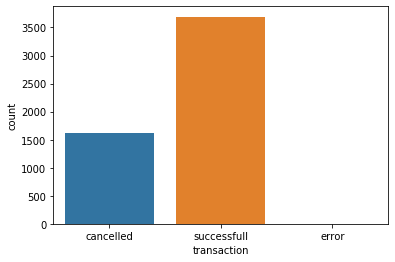

In [12]:
sns.countplot(data.transaction)

In [14]:
data.query('transaction == "successfull"')

,date,name,transaction
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
6,2020-03-02 00:54:12,Olga_Lesnova,successfull
7,2020-03-02 00:18:43,Irina_Lesnova,successfull
8,2020-03-02 00:06:10,Vasilisa_Petrova,successfull
...,...,...,...
5309,2020-03-02 01:26:13,Olga_Ozerova,successfull
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull


In [14]:
# Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull

data1 = data.query('transaction == "successfull"') \
            .groupby('name') \
            .agg({'transaction':'count'})
data1

,transaction
name,
Ekaterina_Fedorova,72
Ekaterina_Ivanova,59
Ekaterina_Lesnova,63
Ekaterina_Ozerova,72
Ekaterina_Petrova,68
Ekaterina_Polyanova,68
Ekaterina_Smirnova,77
Irina_Fedorova,62
Irina_Ivanova,60


In [24]:
data.query('transaction == "successfull"').name.value_counts().quantile(q=0.25)

61.0

In [25]:
# Сколько транзакций осуществил каждый из пользователей в среднем?

data.query('transaction == "successfull"').name.value_counts().mean()

65.92857142857143

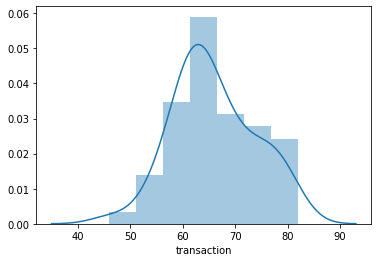

In [15]:
# Построим гистограмму числа успешных транзакций, совершённых каждым пользователем

sns.distplot(data1.transaction)

In [17]:
data2 = pd.read_csv('https://stepik.org/media/attachments/lesson/361624/transaction_data_updated.csv')

In [18]:
# Построим сводную таблицу, где столбцы – имена пользователей, строки – минута времени осуществления операции (minute)
# значения – число совершённых операций

user_vs_minute_pivot = data2.pivot_table(index='minute',columns='name',values='transaction',aggfunc='count')
user_vs_minute_pivot = user_vs_minute_pivot.fillna(0)
user_vs_minute_pivot

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
5,3.0,0.0,2.0,3.0,1.0,0.0,5.0,3.0,1.0,3.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0
6,4.0,1.0,2.0,2.0,0.0,4.0,5.0,2.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,2.0
7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,3.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,2.0
8,2.0,4.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0


In [19]:
# Посчитаем число минут, прошедших с начала дня для каждой транзакции, и построим график распределения

data2.date = pd.to_datetime(data2.date)
data2['hours'] = data2.date.dt.hour
data2

,date,name,transaction,minute,hours
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,0
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,0
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,1
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,0
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,0
...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,0
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,0
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,0
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,0


In [21]:
data2['minutes'] = data2['hours']*60 + data2['minute']
data2

,date,name,transaction,minute,hours,minutes
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,0,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,0,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,1,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,0,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,0,17
...,...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,0,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,0,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,0,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,0,13


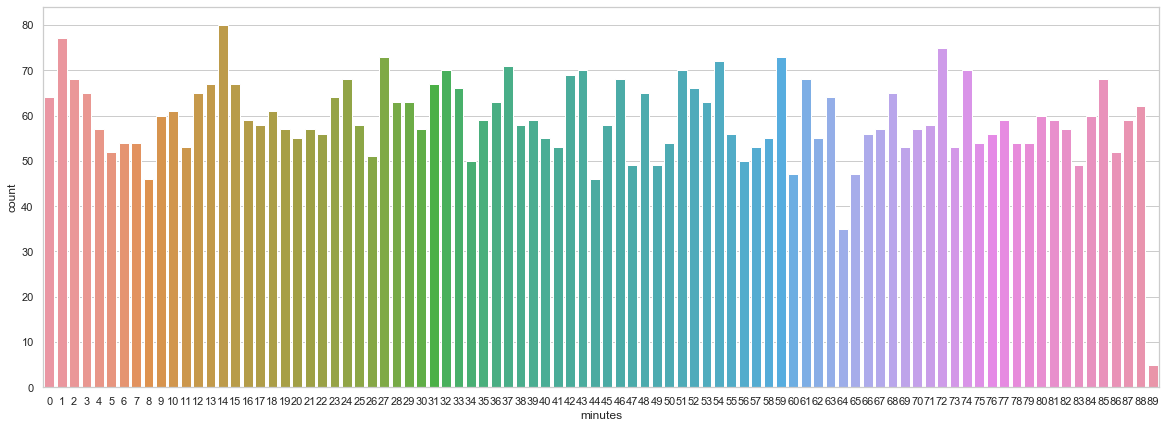

In [23]:
sns.set(style='whitegrid',rc={'figure.figsize':(20,7)})
sns.countplot(data2.minutes)

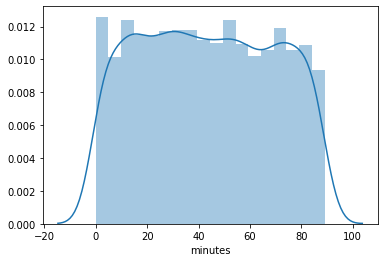

In [46]:
sns.distplot(data2.minutes)